In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
from collections import defaultdict

In [37]:
data = pd.read_csv('/Users/dirkhovy/data/data/bob-ross/elements-by-episode.csv')

c = defaultdict(int)
entries, headers = data.shape

c = data.corr()

for entry in c.columns:
    on = [x for x in c.columns if (data.corr() > 0.2)[entry][x] and x != entry]
    print(entry, on)

APPLE_FRAME ['BRIDGE', 'BUILDING']
AURORA_BOREALIS ['NIGHT']
BARN ['FENCE', 'PATH', 'STRUCTURE', 'WINDMILL']
BEACH ['CLIFF', 'CLOUDS', 'OCEAN', 'PALM_TREES', 'ROCKS', 'WAVES']
BOAT ['DOCK']
BRIDGE ['APPLE_FRAME', 'BUILDING', 'STRUCTURE']
BUILDING ['APPLE_FRAME', 'BRIDGE']
BUSHES ['TREE', 'TREES']
CABIN ['SNOW', 'STRUCTURE', 'WINTER']
CACTUS ['PATH']
CIRCLE_FRAME []
CIRRUS ['CLOUDS']
CLIFF ['BEACH', 'LIGHTHOUSE', 'OCEAN', 'ROCKS', 'WAVES']
CLOUDS ['BEACH', 'CIRRUS', 'CUMULUS', 'OCEAN', 'WAVES']
CONIFER ['MOUNTAIN', 'MOUNTAINS', 'SNOW', 'SNOWY_MOUNTAIN', 'TREE', 'TREES', 'WINTER']
CUMULUS ['CLOUDS', 'WAVES']
DECIDUOUS ['TREE', 'TREES']
DIANE_ANDRE ['GUEST']
DOCK ['BOAT']
DOUBLE_OVAL_FRAME []
FARM []
FENCE ['BARN', 'STRUCTURE']
FIRE ['PERSON']
FLORIDA_FRAME ['PALM_TREES']
FLOWERS ['GUEST']
FOG ['TOMB_FRAME']
FRAMED ['OVAL_FRAME']
GRASS []
GUEST ['DIANE_ANDRE', 'FLOWERS', 'PORTRAIT', 'STEVE_ROSS']
HALF_CIRCLE_FRAME []
HALF_OVAL_FRAME []
HILLS []
LAKE ['MOUNTAIN', 'SNOWY_MOUNTAIN', 'TREE', 

In [59]:
for given in ['LAKE', 'RIVER']:
    print('%s: %s' % (given, len(data[given].nonzero()[0])))
    for cond in ['TREE', 'MOUNTAIN']:
        print(len(data.ix[data[given].nonzero()][cond].nonzero()[0]))
    print


LAKE: 143
142
81
RIVER: 126
126
49


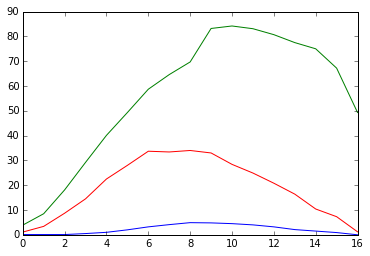

In [92]:
data = pd.read_csv('/Users/dirkhovy/data/data/drug-use-by-age/drug-use-by-age.csv')
# print(data)
data['cocaine-use'].plot()
data['alcohol-use'].plot()
data['marijuana-use'].plot()
# ax.set_xticklabels(data.age.values)


In [111]:
import random
from collections import Counter

def sample_from(x):
    return random.randint(0, 100) < x

samples = []
values = data.age.values.tolist()
for i in range(10000):
    x = random.randint(0, len(values)-1)
    
    if sample_from(data['marijuana-use'][x]):
        samples.append(values[x])

c = Counter(samples)
for k in sorted(c.keys()):
    print('%s: %s' % (k, c[k]))

12: 9
13: 21
14: 50
15: 99
16: 123
17: 179
18: 174
19: 182
20: 188
21: 188
22-23: 184
24-25: 139
26-29: 104
30-34: 108
35-49: 81
50-64: 40
65+: 7


In [121]:
point_samples = []
for i in range(len(values)):
     point_samples.extend([values[i]] * int(data['marijuana-use'][i]))
# point_samples
# values

In [132]:
samples = {}
for i in range(10000):
    x = random.randint(0, len(point_samples)-1)
    age = point_samples[x]
    samples[age] = samples.get(age, 1) + 1

samples
data['new'] = samples
data.new

{'12': 34,
 '13': 100,
 '14': 248,
 '15': 415,
 '16': 725,
 '17': 896,
 '18': 1054,
 '19': 1038,
 '20': 1068,
 '21': 1035,
 '22-23': 902,
 '24-25': 800,
 '26-29': 627,
 '30-34': 508,
 '35-49': 311,
 '50-64': 218,
 '65+': 38}